In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras import Sequential, layers, optimizers, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('ramen-ratings.csv', delimiter=';')
df.head()

,"Review #,Brand,Variety,Style,Country,Stars,Top Ten"
0,"2580,New Touch,T's Restaurant Tantanmen ,Cup,J..."
1,"2579,Just Way,Noodles Spicy Hot Sesame Spicy H..."
2,"2578,Nissin,Cup Noodles Chicken Vegetable,Cup,..."
3,"2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pac..."
4,"2576,Ching's Secret,Singapore Curry,Pack,India..."


# Split Data

In [14]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(Y, y, test_size=0.2, random_state=42)

NameError: name 'x' is not defined

## Standarisasi

In [22]:
dataset =  df.copy()
Scaler = MinMaxScaler()
Normalized_Data = Scaler.fit_transform(dataset[['Stars']])
dataset['Stars'] = Normalized_Data

KeyError: "None of [Index(['#'], dtype='object')] are in the [columns]"

In [23]:
print("sebelum dinormalisasi : ")
print("Nilai Standar deviasi >> ", np.std(df['Stars']))
print('\n')
print("setelah distandarisasi : ")
print("Nilai Standar deviasi >> ", np.std(dataset1['Stars']))

sebelum dinormalisasi : 


KeyError: 'Stars'

## Cleaning

In [24]:
dataset2 = df.copy()
dataset2['Stars'] = dataset2['#'].astype('int64')
print("\nJumlah nilai null pada Setiap kolom sebelum cleaning : ")
dataset2.isna().sum()

KeyError: '#'

In [25]:
dataset2.loc[200:, 'Stars'] = np.nan

print("Jumlah Nilai Null pada kolom  Stars sebelum >>", dataset2['Stars'].isna().sum())

dataset2['Stars'].fillna(dataset2['Stars'].median(), inplace=True)

print("\nJumlah Nilai Null pada kolom  Stars Setelah >>", dataset2['Stars'].isna().sum())

Jumlah Nilai Null pada kolom  Stars sebelum >> 1970

Jumlah Nilai Null pada kolom  Stars Setelah >> 1970


C:\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [26]:
dataset2.loc[2000:, 'Stars'] = np.nan

print("Jumlah Nilai Null pada kolom  Stars sebelum >>", dataset2['Stars'].isna().sum())

dataset2['Stars'].fillna(dataset2['Stars'].mode()[0], inplace=True)

print("\nJumlah Nilai Null pada kolom  Stars setelah >>", dataset2['Stars'].isna().sum())

Jumlah Nilai Null pada kolom  Stars sebelum >> 1970


KeyError: 0

In [27]:
dataset2.loc[200:, 'Stars'] = np.nan

print("Jumlah Nilai Null pada kolom  Stars sebelum >>", dataset2['Stars'].isna().sum())

dataset2['Stars'].fillna(dataset2['Stars'].mean(), inplace=True)

print("\nJumlah Nilai Null pada kolom  Stars setelah >>", dataset2['Stars'].isna().sum())

Jumlah Nilai Null pada kolom  Stars sebelum >> 1970

Jumlah Nilai Null pada kolom  Stars setelah >> 1970


In [28]:
dataset2.iloc[100, :] = dataset2.iloc[101, :]
dataset2.iloc[200, :] = dataset2.iloc[201, :]
dataset2.iloc[300, :] = dataset2.iloc[301, :]
dataset2.iloc[400, :] = dataset2.iloc[401, :]
dataset2.duplicated().sum()

4

In [29]:
dataset2.drop_duplicates(inplace=True)
dataset2.duplicated().sum()

0

## Encoding

In [30]:
print("Tipe data kolom 'Stars' sebelum dirubah => ", dataset2['Stars'].dtypes )

Tipe data kolom 'Stars' sebelum dirubah =>  float64


In [31]:
dataset2['Stars'] = dataset2['Stars'].astype('int64')
print("Tipe data kolom 'Stars' setelah dirubah => ", dataset2['Stars'].dtypes )

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [32]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1966 entries, 0 to 1969
Data columns (total 2 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Review #,Brand,Variety,Style,Country,Stars,Top Ten  1966 non-null   object 
 1   Stars                                               0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 46.1+ KB


## Sequential Model

In [33]:
from sklearn.datasets import load_breast_cancer

In [34]:
X, y = load_breast_cancer(return_X_y = True, as_frame = True)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
X_train.shape

(455, 30)

In [38]:
model = Sequential([
    layers.Dense(8, activation = 'relu', input_shape= [30]),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid'),
])
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [39]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Callback

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

# Membuat callback untuk early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [41]:
train = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
12/12 [==============================] - 1s 25ms/step - loss: 7.3820 - accuracy: 0.3791 - val_loss: 1.7779 - val_accuracy: 0.3956
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 1.0192 - accuracy: 0.6126 - val_loss: 0.4250 - val_accuracy: 0.7912
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3940 - accuracy: 0.7967 - val_loss: 0.3056 - val_accuracy: 0.8791
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2935 - accuracy: 0.8846 - val_loss: 0.2835 - val_accuracy: 0.9011
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.2674 - accuracy: 0.8791 - val_loss: 0.2948 - val_accuracy: 0.9011
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2536 - accuracy: 0.9011 - val_loss: 0.2907 - val_accuracy: 0.9011
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.2586 - accuracy: 0.8956 - val_loss: 0.2825 - val_accuracy: 0.8462
Epoch 8/100


In [46]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [47]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1047 - accuracy: 0.9561


[0.10473791509866714, 0.9561403393745422]

In [42]:
from sklearn.metrics import accuracy_score

In [48]:
y_pred = np.where(y_pred >0.5, 1, 0)
y_pred

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
    

## Akurasi

In [49]:
accuracy_score(y_test, y_pred)

0.956140350877193

## grafik yang menampilkan pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation

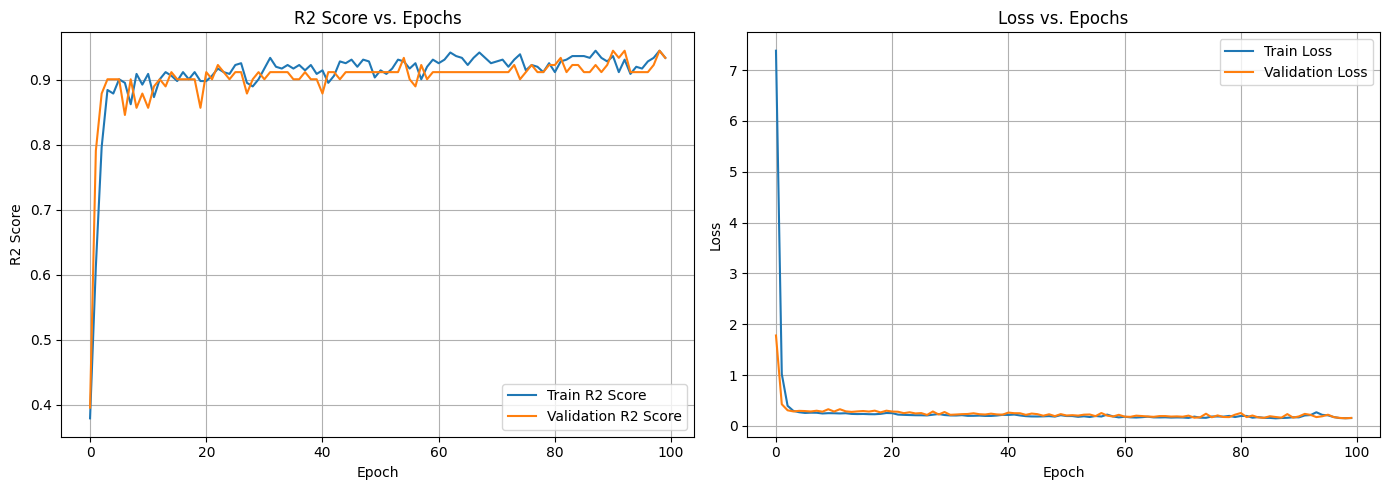

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='Train R2 Score')
plt.plot(train.history['val_accuracy'], label='Validation R2 Score')
plt.title('R2 Score vs. Epochs')
plt.ylabel('R2 Score')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

# Buat grafik Loss
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='Train Loss')
plt.plot(train.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()